In [2]:
import yfinance as yf
import pandas as pd
from datetime import datetime


ticker = 'ADANIPORTS.NS'  
df = yf.download(ticker)

df


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-11-27,154.000000,207.000000,154.000000,191.800003,174.525604,27262365
2007-11-28,194.000000,197.800003,174.929993,177.000000,161.058594,21958915
2007-11-29,181.000000,182.800003,168.460007,177.399994,161.422546,25616715
2007-11-30,178.000000,191.399994,178.000000,185.800003,169.066025,23047035
2007-12-03,187.949997,198.860001,184.399994,196.000000,178.347336,14578850
...,...,...,...,...,...,...
2024-06-27,1475.599976,1494.000000,1459.000000,1485.500000,1485.500000,7803408
2024-06-28,1480.000000,1494.000000,1445.000000,1478.099976,1478.099976,11534763
2024-07-01,1483.000000,1491.400024,1471.599976,1474.500000,1474.500000,3372730


In [32]:
df.tail(204)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-21,840.099976,864.099976,838.500000,858.150024,854.483887,17432300
2023-08-22,863.900024,869.000000,853.349976,854.500000,850.849426,8037324
2023-08-23,858.549988,862.450012,820.099976,825.700012,822.172485,4748732
2023-08-24,834.000000,844.400024,820.200012,822.349976,818.836792,4692796
2023-08-25,823.000000,830.400024,803.500000,806.599976,803.154053,4442243
...,...,...,...,...,...,...
2024-06-14,1409.000000,1442.000000,1395.449951,1430.699951,1430.699951,5651491
2024-06-18,1447.000000,1458.599976,1434.050049,1445.000000,1445.000000,5651898
2024-06-19,1446.000000,1452.000000,1420.449951,1448.400024,1448.400024,4484742


In [3]:
import numpy as np
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3885

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.09149939],
       [0.08184108],
       [0.08210212],
       ...,
       [0.92857425],
       [0.92880264],
       [0.95216533]])

In [11]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.09149939, 0.08184108, 0.08210212, 0.08758386, 0.09424026,
       0.10324598, 0.1078141 , 0.10861025, 0.10990238, 0.10645019,
       0.10285442, 0.10166672, 0.113968  , 0.110816  , 0.10262602,
       0.10262602, 0.10558225, 0.10470777, 0.11731578, 0.12294109])]
[0.1244746716015329]

[array([0.09149939, 0.08184108, 0.08210212, 0.08758386, 0.09424026,
       0.10324598, 0.1078141 , 0.10861025, 0.10990238, 0.10645019,
       0.10285442, 0.10166672, 0.113968  , 0.110816  , 0.10262602,
       0.10262602, 0.10558225, 0.10470777, 0.11731578, 0.12294109]), array([0.08184108, 0.08210212, 0.08758386, 0.09424026, 0.10324598,
       0.1078141 , 0.10861025, 0.10990238, 0.10645019, 0.10285442,
       0.10166672, 0.113968  , 0.110816  , 0.10262602, 0.10262602,
       0.10558225, 0.10470777, 0.11731578, 0.12294109, 0.12447467])]
[0.1244746716015329, 0.1293625606958556]



In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(100))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=10, epochs=20)

Epoch 1/20
387/387 [==============================] - 16s 24ms/step - loss: 6.9078e-04
Epoch 2/20
387/387 [==============================] - 9s 24ms/step - loss: 2.2375e-04
Epoch 3/20
387/387 [==============================] - 9s 23ms/step - loss: 1.7580e-04
Epoch 4/20
387/387 [==============================] - 9s 23ms/step - loss: 1.3667e-04
Epoch 5/20
387/387 [==============================] - 9s 24ms/step - loss: 1.1073e-04
Epoch 6/20
387/387 [==============================] - 10s 26ms/step - loss: 8.7981e-05
Epoch 7/20
387/387 [==============================] - 11s 27ms/step - loss: 8.1175e-05
Epoch 8/20
387/387 [==============================] - 10s 27ms/step - loss: 7.2447e-05
Epoch 9/20
387/387 [==============================] - 10s 26ms/step - loss: 6.4023e-05
Epoch 10/20
387/387 [==============================] - 9s 24ms/step - loss: 8.1789e-05
Epoch 11/20
387/387 [==============================] - 9s 24ms/step - loss: 6.9377e-05
Epoch 12/20
387/387 [==========================

In [27]:
from  sklearn.metrics import r2_score
test_data = scaled_data[training_data_len - 20: , :]

x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_test,predictions)
r2


7/7 [==============================] - 2s 18ms/step


0.9749789204343269

In [36]:
last_30_days_prices = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                10, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                90, 80, 70, 60, 50, 40, 30, 20, 10, 40]).reshape(-1, 1)




last_30_days_scaled = scaler.transform(last_30_days_prices)

last_30_days_scaled = np.reshape(last_30_days_scaled, (1, last_30_days_scaled.shape[0], 1))

predicted_price_scaled = model.predict(last_30_days_scaled)

predicted_price = scaler.inverse_transform(predicted_price_scaled)

print("Predicted price:", predicted_price[0][0])

1/1 [==============================] - 0s 44ms/step
Predicted price: 53.754005


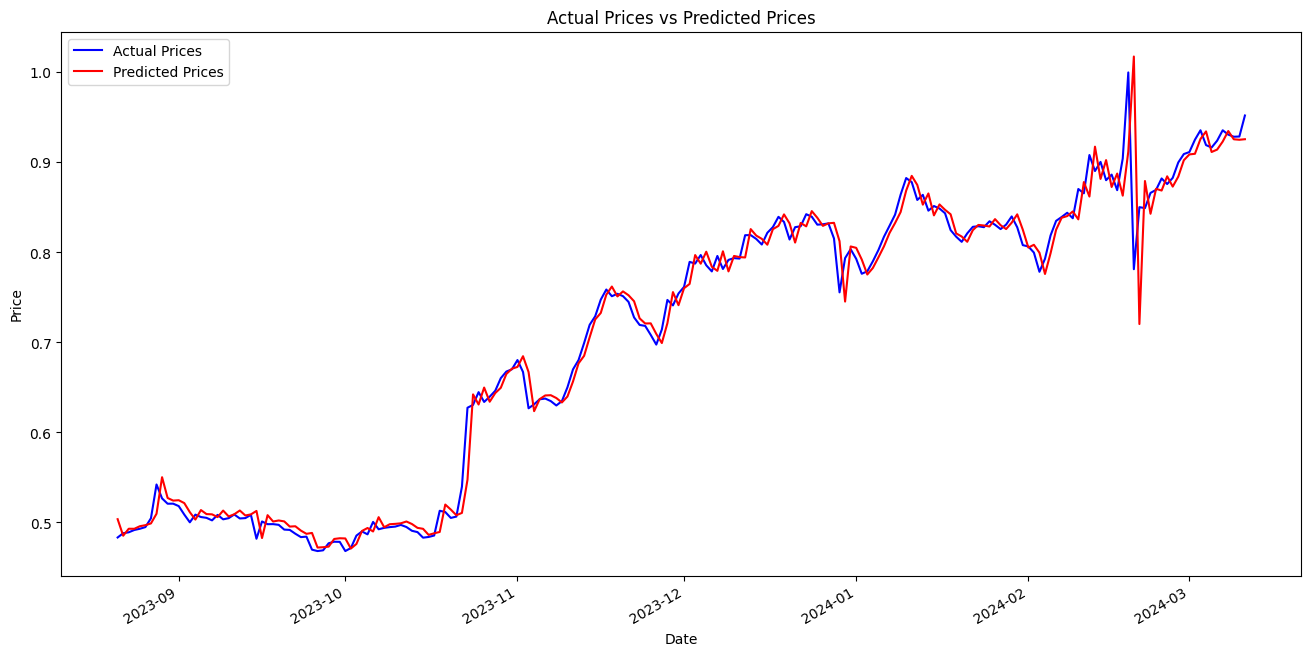

In [28]:
import matplotlib.pyplot as plt
y_test = np.array(y_test)
predictions = np.array(predictions)
test_dates = pd.date_range(start='2023-08-21', periods=len(y_test), freq='D')

# Plot the data
plt.figure(figsize=(16, 8))
plt.plot(test_dates, y_test, color='blue', label='Actual Prices')
plt.plot(test_dates, predictions, color='red', label='Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()

In [29]:
import joblib


model_file_path = '27.joblib'
scaler_file_path = 'scaler27.joblib'

joblib.dump(model, model_file_path)
joblib.dump(scaler, scaler_file_path)

print(f"Model saved to {model_file_path}")
print(f"Scaler saved to {scaler_file_path}")



Model saved to 27.joblib
Scaler saved to scaler27.joblib


In [14]:
model_file_path = '27.joblib'
scaler_file_path = 'scaler27.joblib'

loaded_model = joblib.load(model_file_path)
loaded_scaler = joblib.load(scaler_file_path)

new_data = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                10, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                90, 80, 70, 60, 50, 40, 30, 20, 10, 40]).reshape(-1, 1)

new_data_scaled = loaded_scaler.transform(new_data)
new_data_scaled = np.reshape(new_data_scaled, (1, new_data_scaled.shape[0], 1))
predicted_price = loaded_model.predict(new_data_scaled)
predictions = scaler.inverse_transform(predicted_price)
predictions


1/1 [==============================] - 2s 2s/step


array([[57.02381]], dtype=float32)